#Import

In [ ]:
import pandas as pd
import sys
import io
from pprint import pprint
from itertools import zip_longest
import string

#Load Data

In [52]:
name_of_file = '/content/LP_destinations.csv'
df = pd.read_csv(name_of_file,encoding='unicode_escape',index_col=0)
df.head()

,city,country,description
0,Antalya,Turkey,"[""Once seen simply as the gateway to the Turki..."
1,Athens,Greece,"['With equal measures of grunge and grace, Ath..."
2,Ayia-napa,Cyprus,"[""Endless blue-sky days and a coastline riddle..."
3,Bangkok,Thailand,"['Same same, but different. This Thailish T-sh..."
4,Barcelona,Spain,['Barcelona is an enchanting seaside city with...


#counts the number of words in the description of the city

In [51]:
df["num_of_words"]= df["description"].str.count(" ") + 1
df.head()

,city,country,description,num_of_words,No_punct_description,has_restaurants,has_museums,has_beaches
0,Antalya,Turkey,"[""Once seen simply as the gateway to the Turki...",112,Once seen simply as the gateway to the Turkish...,0,1,1
1,Athens,Greece,"['With equal measures of grunge and grace, Ath...",401,With equal measures of grunge and grace Athens...,1,0,2
2,Ayia-napa,Cyprus,"[""Endless blue-sky days and a coastline riddle...",148,Endless bluesky days and a coastline riddled w...,0,0,2
3,Bangkok,Thailand,"['Same same, but different. This Thailish T-sh...",398,Same same but different This Thailish Tshirt p...,1,0,0
4,Barcelona,Spain,['Barcelona is an enchanting seaside city with...,427,Barcelona is an enchanting seaside city with b...,1,2,7


#contains the text of the description column after removing all new line characters (\n) and all punctuation marks 

In [50]:
df["No_punct_description"]= df["description"].str.translate(str.maketrans('', '',
string.punctuation))
df.head()

,city,country,description,num_of_words,No_punct_description,has_restaurants,has_museums,has_beaches
0,Antalya,Turkey,"[""Once seen simply as the gateway to the Turki...",112,Once seen simply as the gateway to the Turkish...,0,1,1
1,Athens,Greece,"['With equal measures of grunge and grace, Ath...",401,With equal measures of grunge and grace Athens...,1,0,2
2,Ayia-napa,Cyprus,"[""Endless blue-sky days and a coastline riddle...",148,Endless bluesky days and a coastline riddled w...,0,0,2
3,Bangkok,Thailand,"['Same same, but different. This Thailish T-sh...",398,Same same but different This Thailish Tshirt p...,1,0,0
4,Barcelona,Spain,['Barcelona is an enchanting seaside city with...,427,Barcelona is an enchanting seaside city with b...,1,2,7


#contains the number of times the word “restaurant” appears in the description

In [49]:
df["has_restaurants"]= df["description"].str.count("restaurant")
df.head()

,city,country,description,num_of_words,No_punct_description,has_restaurants,has_museums,has_beaches
0,Antalya,Turkey,"[""Once seen simply as the gateway to the Turki...",112,Once seen simply as the gateway to the Turkish...,0,1,1
1,Athens,Greece,"['With equal measures of grunge and grace, Ath...",401,With equal measures of grunge and grace Athens...,1,0,2
2,Ayia-napa,Cyprus,"[""Endless blue-sky days and a coastline riddle...",148,Endless bluesky days and a coastline riddled w...,0,0,2
3,Bangkok,Thailand,"['Same same, but different. This Thailish T-sh...",398,Same same but different This Thailish Tshirt p...,1,0,0
4,Barcelona,Spain,['Barcelona is an enchanting seaside city with...,427,Barcelona is an enchanting seaside city with b...,1,2,7


#contains the number of times the word “museum” appears in the description

In [48]:
df["has_museums"]= df["description"].str.count("museum")
df.head()

,city,country,description,num_of_words,No_punct_description,has_restaurants,has_museums,has_beaches
0,Antalya,Turkey,"[""Once seen simply as the gateway to the Turki...",112,Once seen simply as the gateway to the Turkish...,0,1,1
1,Athens,Greece,"['With equal measures of grunge and grace, Ath...",401,With equal measures of grunge and grace Athens...,1,0,2
2,Ayia-napa,Cyprus,"[""Endless blue-sky days and a coastline riddle...",148,Endless bluesky days and a coastline riddled w...,0,0,2
3,Bangkok,Thailand,"['Same same, but different. This Thailish T-sh...",398,Same same but different This Thailish Tshirt p...,1,0,0
4,Barcelona,Spain,['Barcelona is an enchanting seaside city with...,427,Barcelona is an enchanting seaside city with b...,1,2,7


#contains the number of times the words “beach” or “ocean” or “sea” appears in the description

In [47]:
df["has_beaches"]= df["description"].str.count("beach")+df["description"].str.count("ocean")+df["description"].str.count("sea")
df.head()

,city,country,description,num_of_words,No_punct_description,has_restaurants,has_museums,has_beaches
0,Antalya,Turkey,"[""Once seen simply as the gateway to the Turki...",112,Once seen simply as the gateway to the Turkish...,0,1,1
1,Athens,Greece,"['With equal measures of grunge and grace, Ath...",401,With equal measures of grunge and grace Athens...,1,0,2
2,Ayia-napa,Cyprus,"[""Endless blue-sky days and a coastline riddle...",148,Endless bluesky days and a coastline riddled w...,0,0,2
3,Bangkok,Thailand,"['Same same, but different. This Thailish T-sh...",398,Same same but different This Thailish Tshirt p...,1,0,0
4,Barcelona,Spain,['Barcelona is an enchanting seaside city with...,427,Barcelona is an enchanting seaside city with b...,1,2,7


#calaulate avg num of words

In [ ]:
print(f'avg words in desc col={df["num_of_words"].mean()}')


avg words in desc col=277.07894736842104


#the city with the longest description column 

In [ ]:
df.loc[df["num_of_words"].idxmax()]["city"]

'Florence'

#Histogram

Text(0.5, 0, 'num of words')

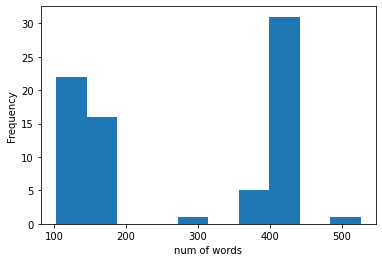

In [46]:
ax=df["num_of_words"].plot(kind='hist')
ax.set_xlabel("num of words")


# the relationship between number of beaches and number of restaurants

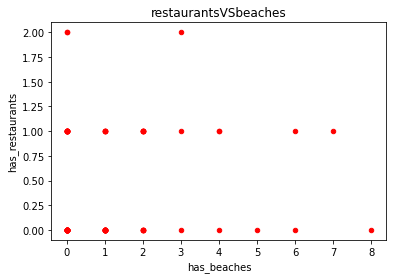

In [ ]:
x="has_beaches"
y="has_restaurants"
ax1 = df.plot(kind='scatter', x=x, y=y, color='r',title="restaurantsVSbeaches")



#shows the relationship between number of museums and the number of beaches

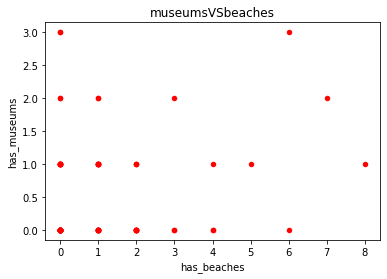

In [ ]:
x="has_beaches"
y="has_museums"
ax1 = df.plot(kind='scatter', x=x, y=y, color='r',title="museumsVSbeaches")
